In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [8]:
df = pd.read_csv('Adult.csv')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [9]:
df['education'].value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [10]:
df = pd.concat([df.drop('occupation', axis = 1), pd.get_dummies(df.occupation).add_prefix('occupation_')], axis = 1)
df = pd.concat([df.drop('workclass', axis = 1), pd.get_dummies(df.workclass).add_prefix('workclass_')], axis = 1)
df = df.drop('education', axis = 1)
df = pd.concat([df.drop('marital-status', axis = 1), pd.get_dummies(df['marital-status']).add_prefix('marital-status_')], axis = 1)
df = pd.concat([df.drop('relationship', axis = 1), pd.get_dummies(df.relationship).add_prefix('relationship_')], axis = 1)
df = pd.concat([df.drop('race', axis = 1), pd.get_dummies(df.race).add_prefix('race_')], axis = 1)
df = pd.concat([df.drop('native-country', axis = 1), pd.get_dummies(df['native-country']).add_prefix('native-country_')], axis = 1)

In [11]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,Male,0,0,40,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,Male,0,0,50,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,Male,0,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,160323,10,Male,7688,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
4,18,103497,10,Female,0,0,30,<=50K,True,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,Female,0,0,38,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
48838,40,154374,9,Male,0,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,58,151910,9,Female,0,0,40,<=50K,False,True,...,False,False,False,False,False,False,False,True,False,False
48840,22,201490,9,Male,0,0,20,<=50K,False,True,...,False,False,False,False,False,False,False,True,False,False


In [12]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [13]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,1,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,1,0,0,50,0,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,1,0,0,40,1,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,160323,10,1,7688,0,40,1,False,False,...,False,False,False,False,False,False,False,True,False,False
4,18,103497,10,0,0,0,30,0,True,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,0,38,0,False,False,...,False,False,False,False,False,False,False,True,False,False
48838,40,154374,9,1,0,0,40,1,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,58,151910,9,0,0,0,40,0,False,True,...,False,False,False,False,False,False,False,True,False,False
48840,22,201490,9,1,0,0,20,0,False,True,...,False,False,False,False,False,False,False,True,False,False


In [14]:
df['gender'].value_counts()

gender
1    32650
0    16192
Name: count, dtype: int64

<Axes: >

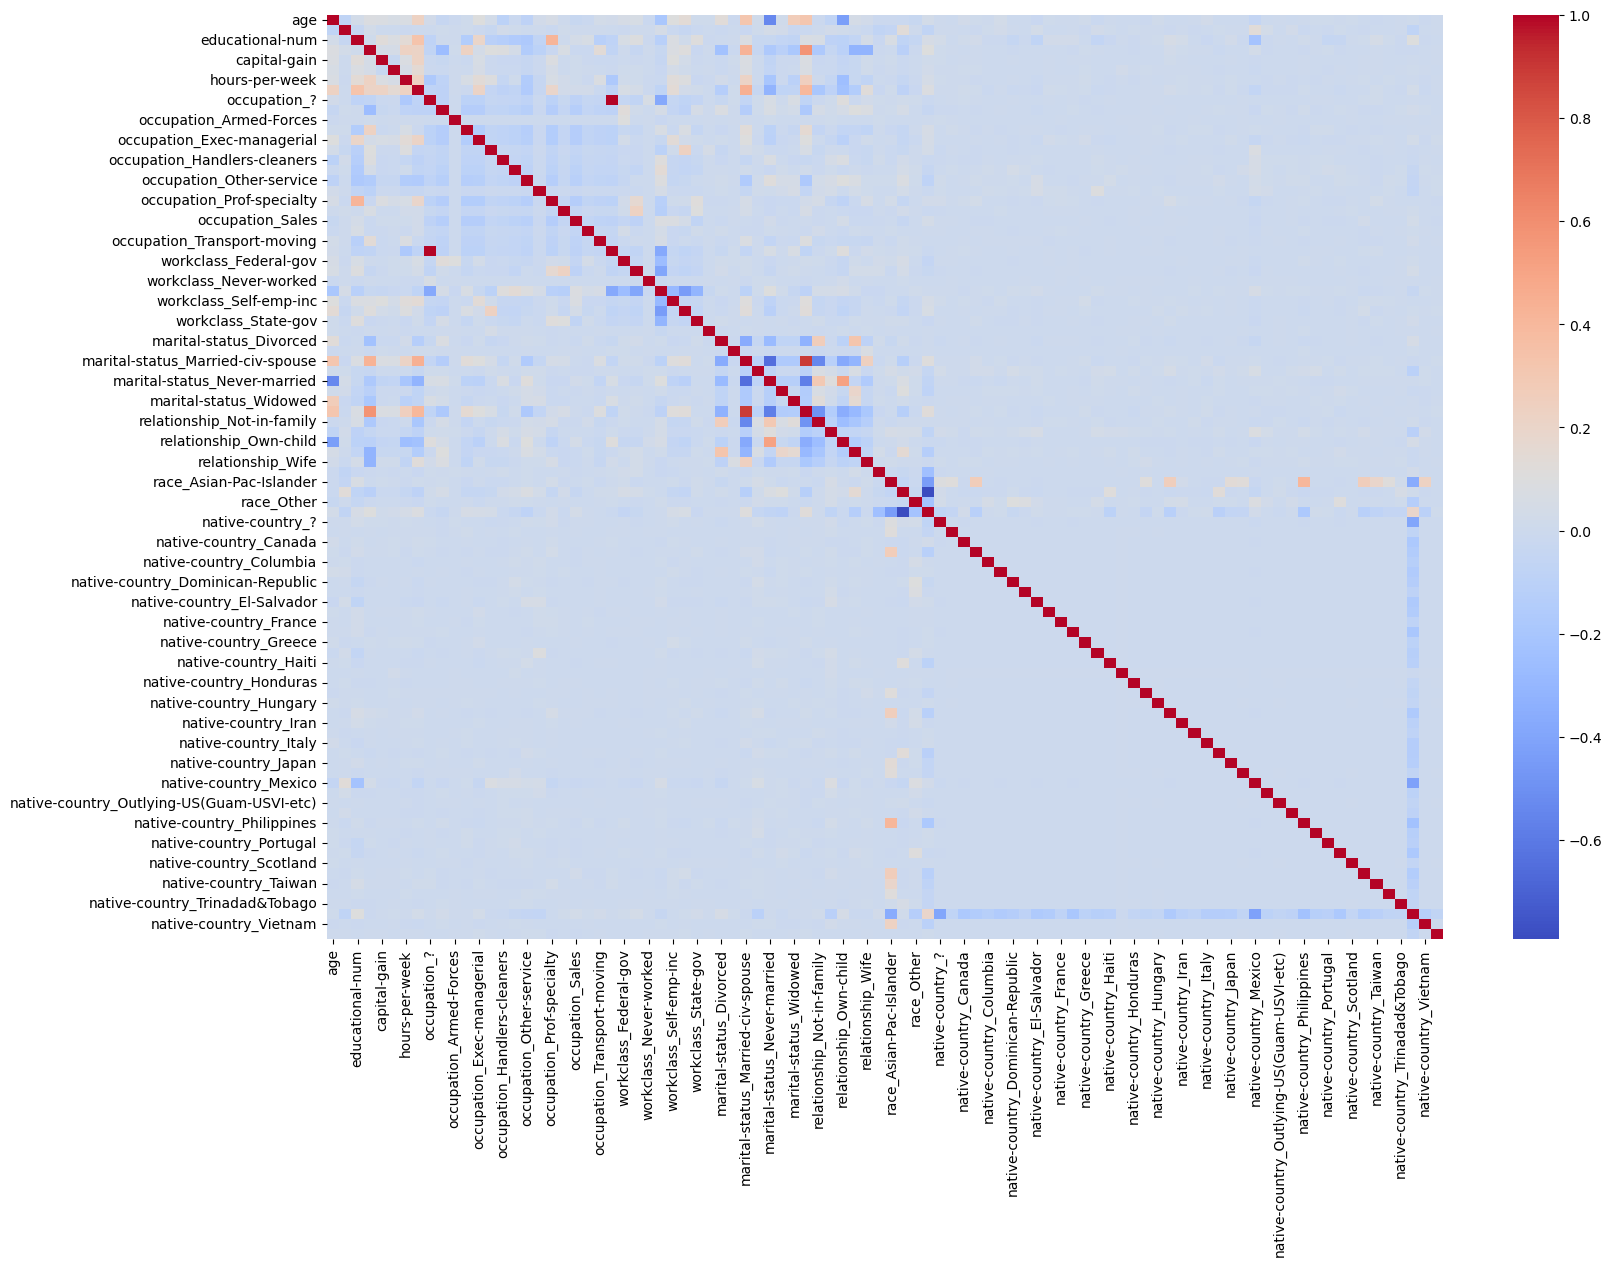

In [15]:
plt.figure(figsize = (18,12))
sns.heatmap(df.corr(), annot = False, cmap = 'coolwarm')

In [16]:
corr = df.corr()['income'].abs()
sorted_corr = corr.sort_values()
num_cols_to_drop = int(0.8*len(df.columns))
cols_to_drop = sorted_corr.iloc[:num_cols_to_drop].index
df_dropped = df.drop(cols_to_drop, axis =1)
df_dropped

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,workclass_Self-emp-inc,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,7,1,0,0,40,0,False,False,False,False,False,False,True,False,False,True,False,False
1,38,9,1,0,0,50,0,False,False,False,False,False,True,False,True,False,False,False,False
2,28,12,1,0,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
3,44,10,1,7688,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
4,18,10,0,0,0,30,0,False,False,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,False,False,False,False,False,True,False,False,False,False,False,True
48838,40,9,1,0,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
48839,58,9,0,0,0,40,0,False,False,False,False,False,False,False,False,False,False,True,False
48840,22,9,1,0,0,20,0,False,False,False,False,False,False,True,False,False,True,False,False


<Axes: >

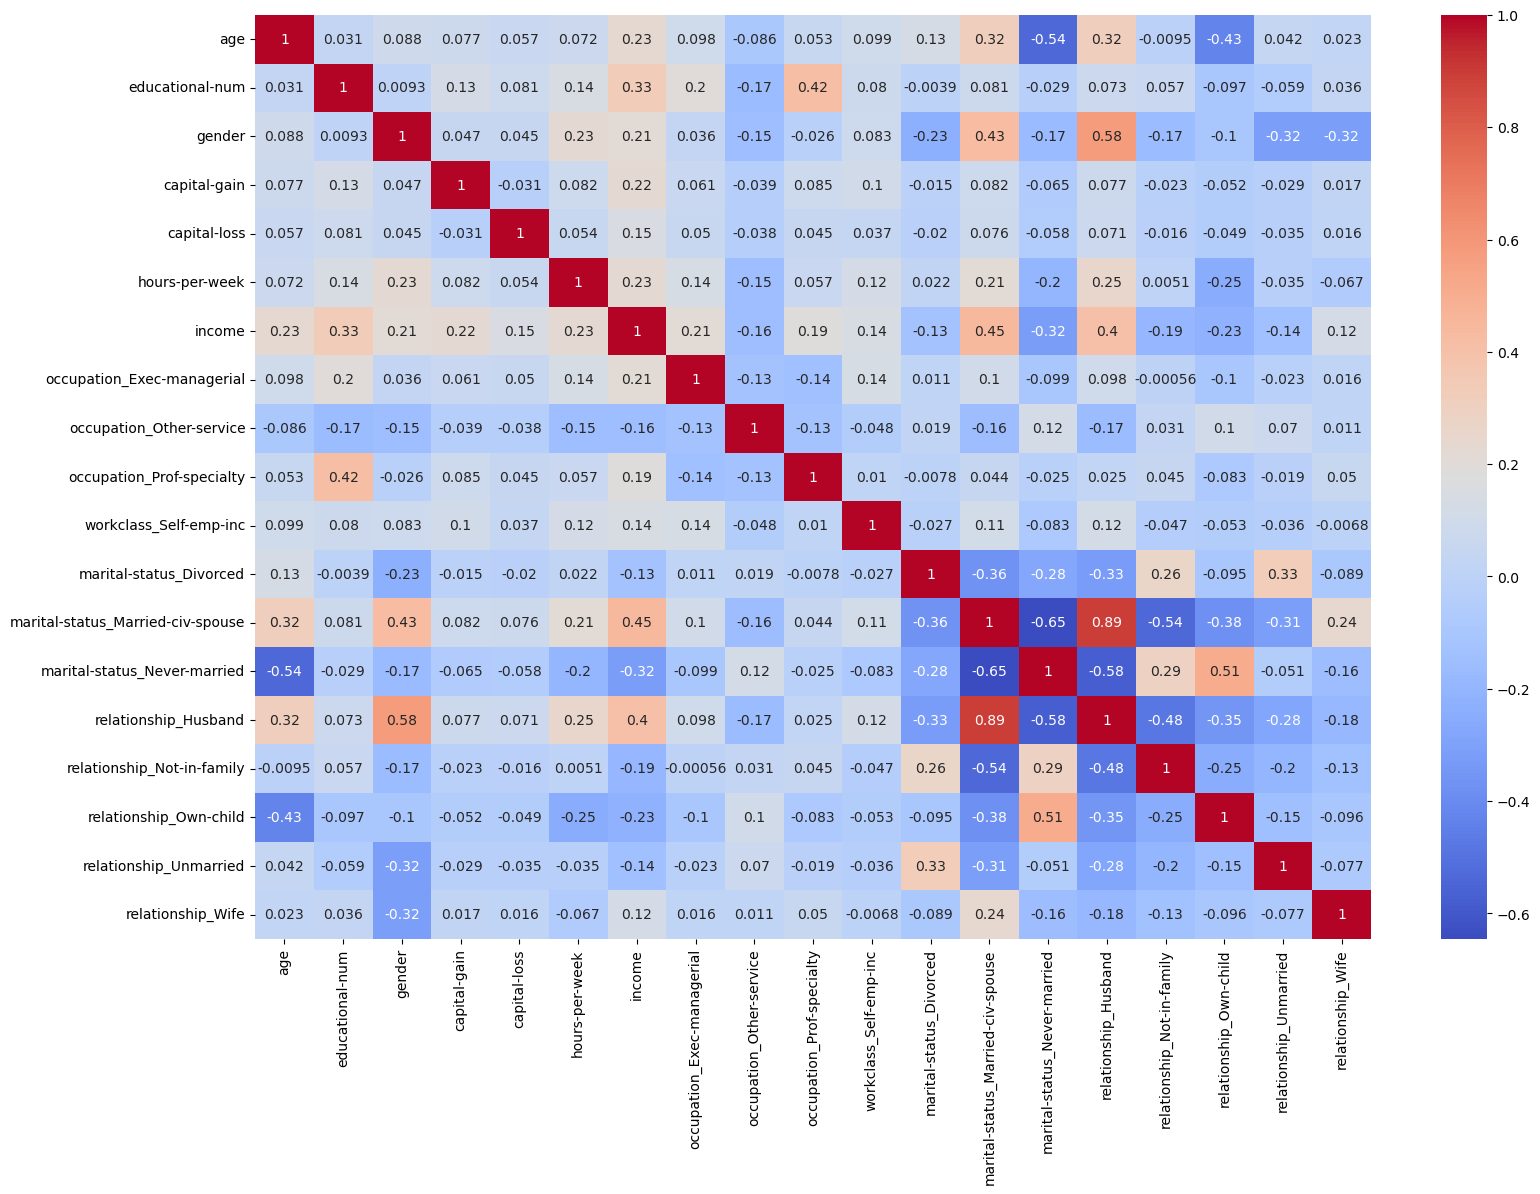

In [17]:
plt.figure(figsize = (18,12))
sns.heatmap(df_dropped.corr(), annot = True, cmap = 'coolwarm')

In [18]:
df = df.drop('fnlwgt', axis = 1)

train_df, test_df = train_test_split(df, test_size = 0.2)
train_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
5286,28,9,0,0,0,46,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
16243,42,11,1,0,0,50,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
31260,55,9,0,0,0,50,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
33066,44,12,1,0,0,40,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
27770,39,10,1,0,0,45,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5438,19,9,0,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
25837,44,14,0,0,0,48,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
40748,27,11,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
6474,41,13,1,0,0,45,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [19]:
test_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
10115,43,10,1,0,1669,45,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
15391,58,15,1,0,0,70,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5093,40,13,1,0,0,50,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
13716,53,9,0,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4902,20,8,1,0,0,30,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24743,63,13,1,0,0,40,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4333,39,10,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
28145,21,9,1,0,0,35,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
13292,28,15,0,0,0,65,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
train_X = train_df.drop('income', axis = 1)
train_y = train_df['income']

test_X = test_df.drop('income', axis = 1)
test_y = test_df['income']

In [21]:
forest = RandomForestClassifier()
forest.fit(train_X, train_y)

RandomForestClassifier()

In [22]:
forest.score(test_X, test_y)

0.8508547446002661

In [23]:
forest.feature_importances_
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key = lambda x: x[1], reverse = True)}
importances

{'age': 0.22728106822854538,
 'educational-num': 0.13155818086029258,
 'hours-per-week': 0.11301367670295391,
 'capital-gain': 0.10858356364436166,
 'marital-status_Married-civ-spouse': 0.07014813656885352,
 'relationship_Husband': 0.04833443736233766,
 'capital-loss': 0.036612033185035454,
 'marital-status_Never-married': 0.024289476293999055,
 'occupation_Exec-managerial': 0.020200665195673193,
 'occupation_Prof-specialty': 0.020012115968780934,
 'relationship_Not-in-family': 0.013973695863745975,
 'gender': 0.011753655772772164,
 'relationship_Wife': 0.00998555731835045,
 'workclass_Private': 0.009283426554232203,
 'marital-status_Divorced': 0.009178625857473244,
 'relationship_Own-child': 0.009072259953975807,
 'workclass_Self-emp-not-inc': 0.008381533317545146,
 'occupation_Other-service': 0.007960855949489866,
 'workclass_Self-emp-inc': 0.006473858072854571,
 'occupation_Sales': 0.006267990668361749,
 'native-country_United-States': 0.006183865035026173,
 'race_White': 0.00615264

In [24]:
param_grid = {'n_estimators': [50, 100, 250],
            'max_depth': [5, 10, 30, None],
            'min_samples_split': [2, 4],
            'max_features': ['sqrt', 'log2']}

grid_search = GridSearchCV(estimator = RandomForestClassifier(),
                          param_grid = param_grid, verbose = 10)

grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.844 total time=   0.7s
[CV 2/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.840 total time=   0.7s
[CV 3/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.832 total time=   0.7s
[CV 4/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.841 total time=   0.7s
[CV 5/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [25]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=30, min_samples_split=4, n_estimators=250)

In [26]:
forest = grid_search.best_estimator_
forest.score(test_X, test_y)

0.8585320913092436

In [27]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key = lambda x: x[1], reverse = True)}
importances

{'age': 0.147445946019611,
 'educational-num': 0.13742728900479206,
 'capital-gain': 0.13518458576203932,
 'marital-status_Married-civ-spouse': 0.0917971773423147,
 'hours-per-week': 0.08745124018478187,
 'relationship_Husband': 0.059566647544780804,
 'capital-loss': 0.04378610321338944,
 'marital-status_Never-married': 0.03374206067269463,
 'occupation_Exec-managerial': 0.024955128953493395,
 'occupation_Prof-specialty': 0.021946350896167484,
 'gender': 0.015899062691490058,
 'relationship_Not-in-family': 0.014171556293317714,
 'relationship_Own-child': 0.01282332785076166,
 'relationship_Wife': 0.012602023613847844,
 'occupation_Other-service': 0.009412725579109249,
 'workclass_Self-emp-not-inc': 0.009061240164864072,
 'workclass_Private': 0.008638227299052496,
 'marital-status_Divorced': 0.008066823208663391,
 'relationship_Unmarried': 0.0071793087383949,
 'workclass_Self-emp-inc': 0.007161359722968725,
 'race_White': 0.006099907086301957,
 'native-country_United-States': 0.00593746